Practice for Data Examination

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to scale data using z-score
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture


In [2]:
auto = pd.read_csv('auto-mpg.csv')
auto.describe()
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [3]:
auto['car name'].nunique()
auto_save = auto.copy()
auto = auto.drop(['car name'], axis = 1)
hp_is_digit = auto['horsepower'].str.isdigit()
auto[hp_is_digit == False]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [4]:
auto = auto.replace('?', np.nan) #replaces all ? with np.nan
auto[hp_is_digit == False]
auto.horsepower.fillna(auto.horsepower.median(), inplace = True) #replace horsepower with the mediqan horsepower
auto[hp_is_digit == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,93.5,2046,19.0,71
126,21.0,6,200.0,93.5,2875,17.0,74
330,40.9,4,85.0,93.5,1835,17.3,80
336,23.6,4,140.0,93.5,2905,14.3,80
354,34.5,4,100.0,93.5,2320,15.8,81
374,23.0,4,151.0,93.5,3035,20.5,82


In [5]:
auto.info() #horsepower is still an object
auto.horsepower = auto.horsepower.astype('float64')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float6

In [6]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


mpg
Skew : 0.5


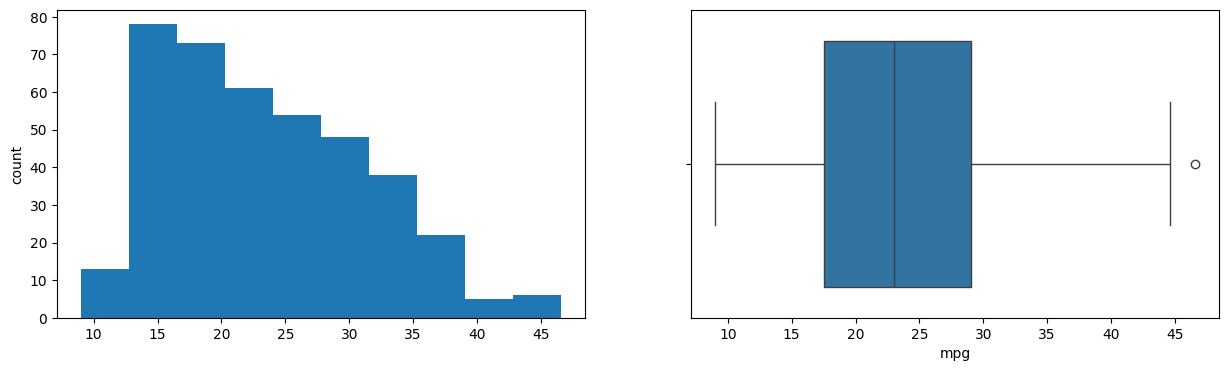

cylinders
Skew : 0.5


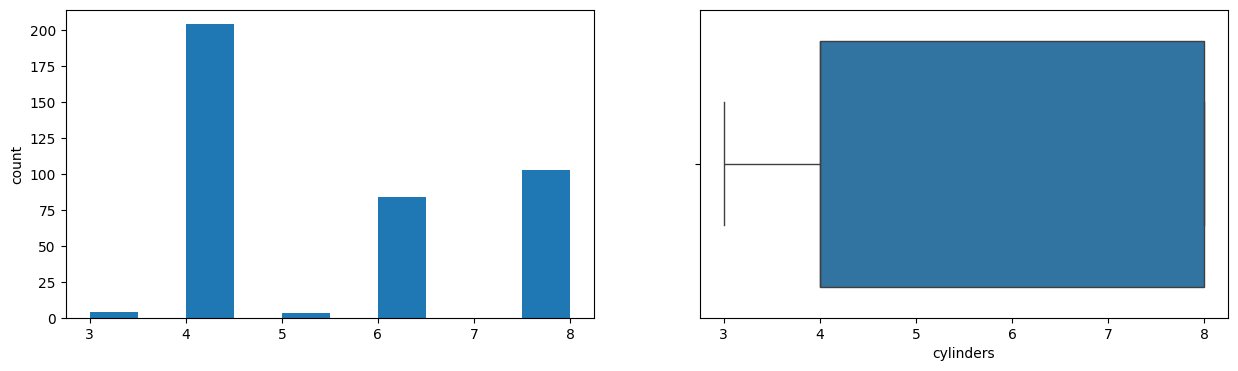

displacement
Skew : 0.7


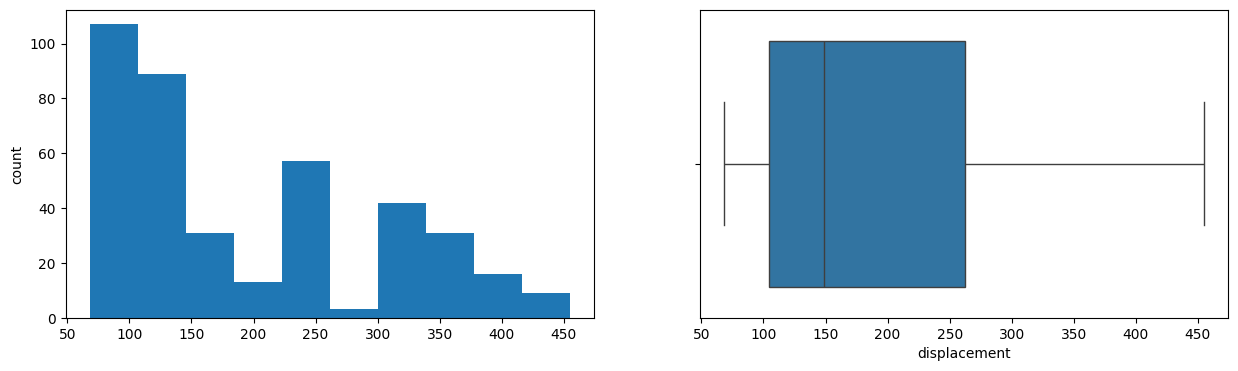

horsepower
Skew : 1.1


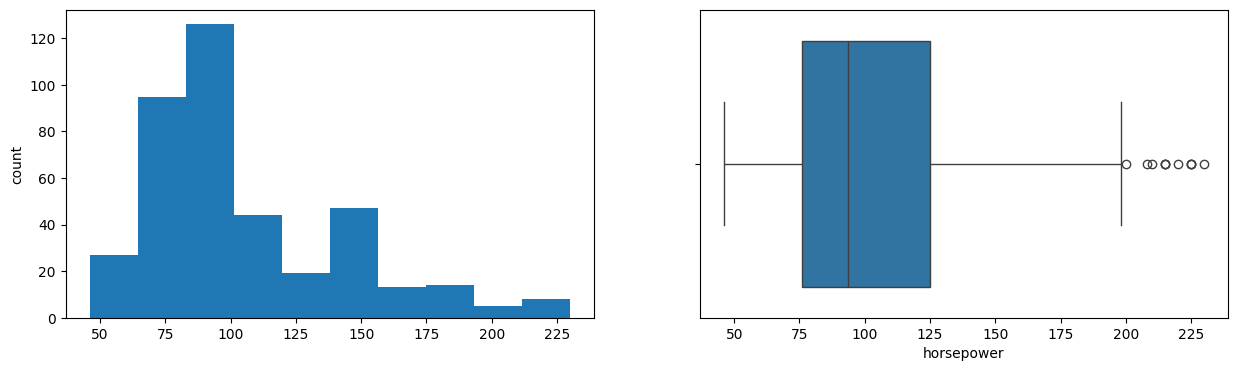

weight
Skew : 0.5


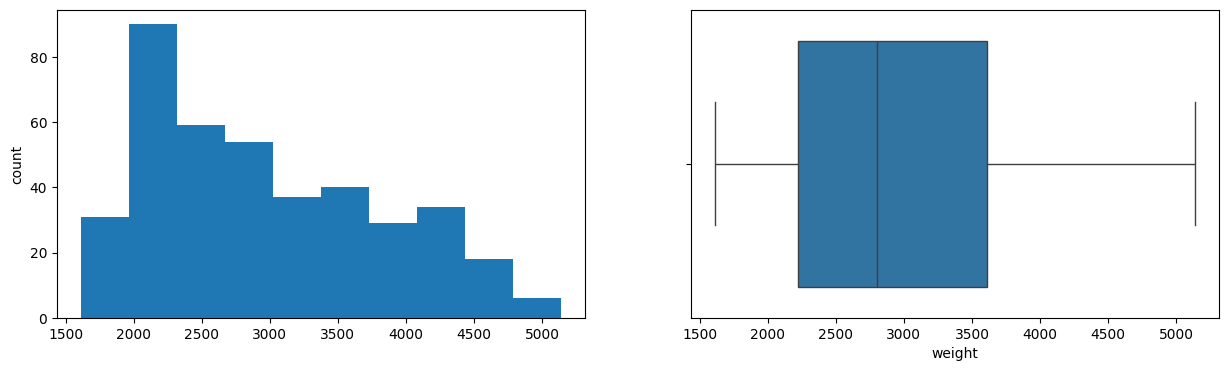

acceleration
Skew : 0.3


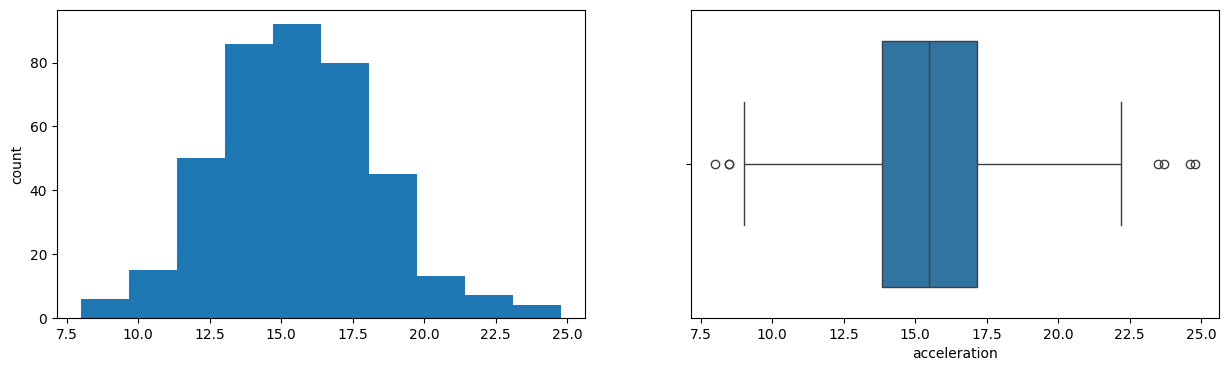

model year
Skew : 0.0


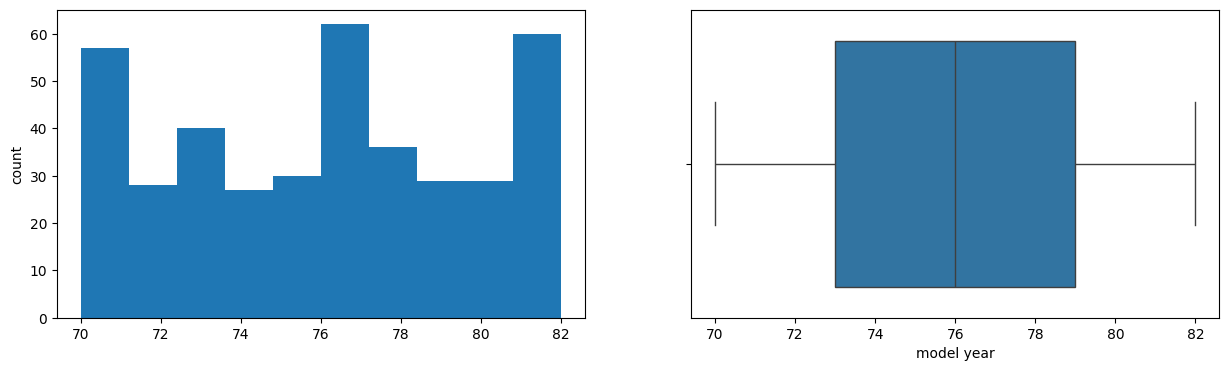

In [7]:
for col in auto.columns:
    print(col)
    print('Skew :', round(auto[col].skew(), 1))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    auto[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=auto[col])
    plt.show()

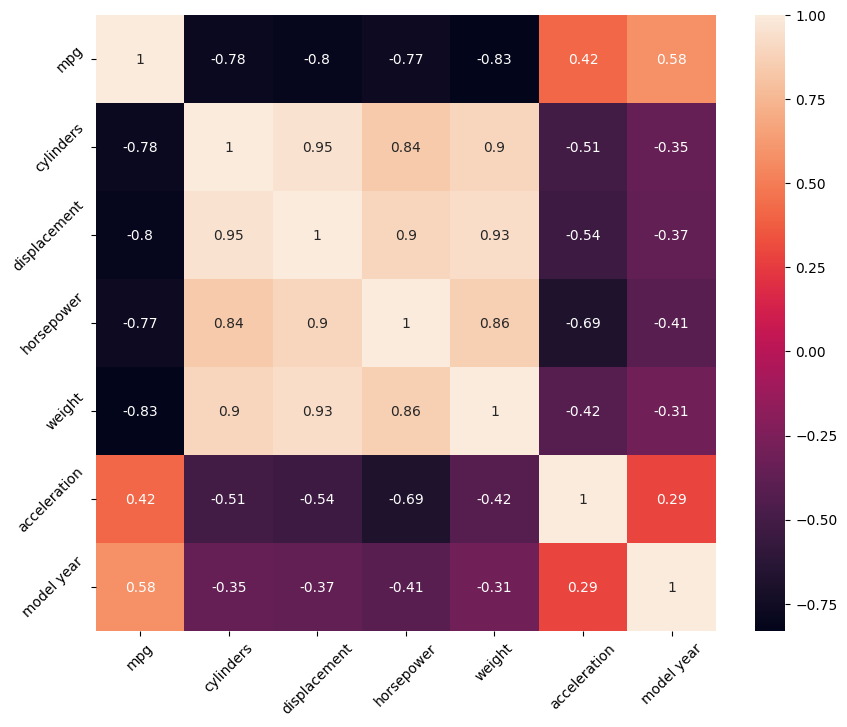

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(auto.corr(), annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

plt.figure(figsize = (10,10))

## Observations
- displacement and cylinder have a strong correlation 
- horsepower and weight and closley correlated
- displacement/weight and mpg are negatively correlated
- There is negative correlation between horsepower and acceleration


In [9]:
scaler = StandardScaler()
auto_scaled = pd.DataFrame(scaler.fit_transform(auto), columns = auto.columns)

In [10]:
auto_scaled.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## Principal Component Analysis

In [68]:
n = auto_scaled.shape[1] #taking number of columns or individual features from auto

pca = PCA(n_components=n, random_state=1)
auto_pca1 = pd.DataFrame(pca.fit_transform(auto_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

x = exp_var.cumsum()
x



,0,1,2,3,4,5,6
0,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566
1,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518
2,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167
3,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296
4,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301
...,...,...,...,...,...,...,...
393,-1.420970,-1.225252,-0.286402,-0.671666,0.054472,-0.187878,0.101922
394,-4.094686,-1.279998,1.960384,1.375464,0.740606,0.175097,0.087391
395,-1.547254,-1.252540,-1.906999,-0.323768,-0.255922,-0.254531,0.149028
396,-2.022942,-1.132137,0.609384,-0.464327,0.186656,0.089169,0.075018


(0.5, 1.05)

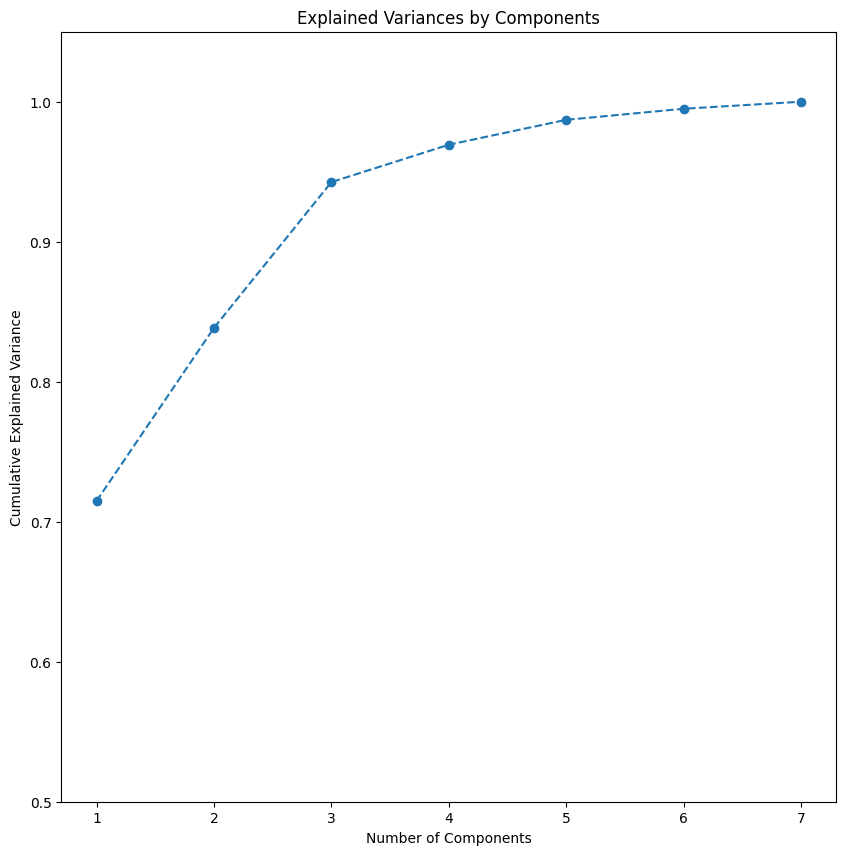

In [12]:
plt.figure(figsize=(10,10))
plt.plot(range(1,8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variances by Components')
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')
plt.ylim([.5,1.05])

In [14]:
m = 1
for com in x:
    if com > .90:
        print(str(com))
        print ("Number of Components to achieve 90% Variation is: " + str(m))
        break
    else:
        m= m+1


0.9425636832481039
Number of Components to achieve 90% Variation is: 3


## Observations
We've reduced our components from 7 to 3 and preserved 94% of the variation

In [71]:
pc_comps = ["PC1", "PC2", "PC3"]
auto_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = auto_scaled.columns)
auto_pca.T



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
PC1,-0.40,0.42,0.43,0.42,0.41,-0.28,-0.23
PC2,-0.21,-0.19,-0.18,-0.09,-0.22,0.02,-0.91
PC3,-0.26,0.14,0.10,-0.17,0.28,0.89,-0.02


In [21]:
def color_high(val):
    if val <= -0.40: # you can decide any value as per your understanding
        return 'background: green'
    elif val >= 0.40:
        return 'background: blue'   
    
auto_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


## Observations
- Each principal component is a lienar combination of the 7 features. It can be seen that PCA is composed of -.40 mpg + .42 cylinders + .43 displacement + .42 horsepower + .41 weight

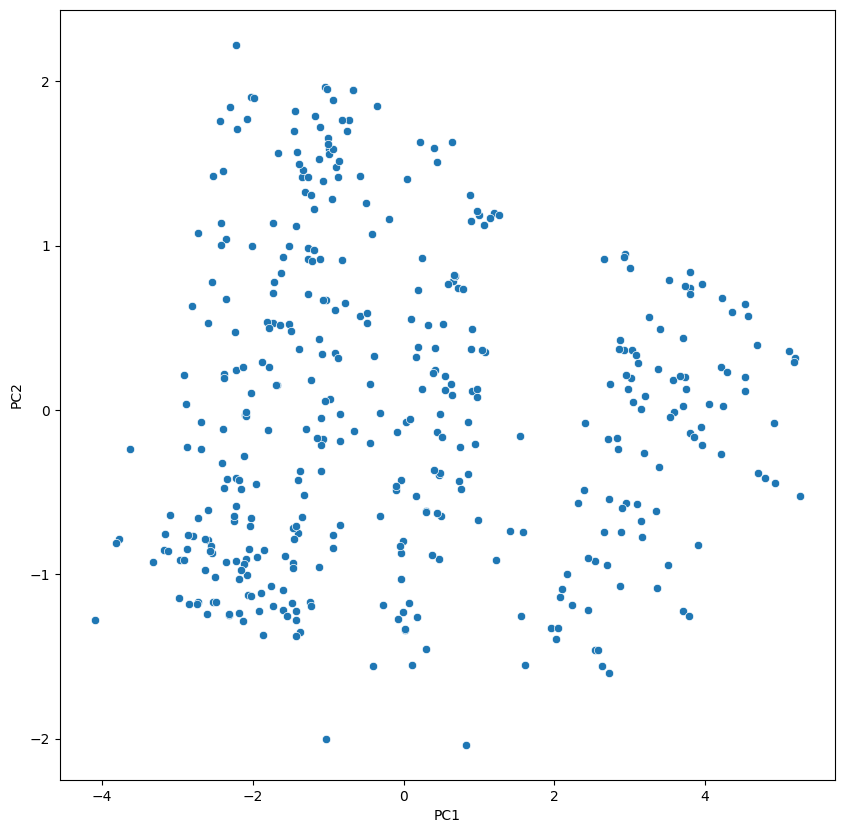

In [23]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = auto_pca1[0], y = auto_pca1[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Text(0, 0.5, 'PC2')

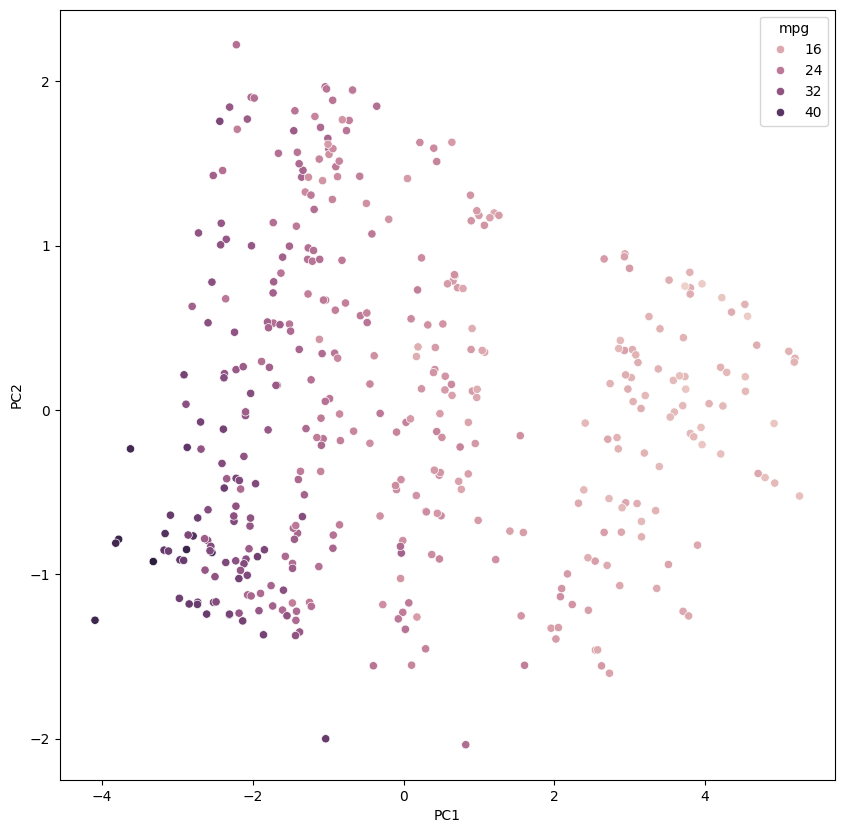

In [81]:
df_concat = pd.concat([auto_pca1, auto], axis = 1)

plt.figure(figsize = (10,10))
sns.scatterplot(x=auto_pca1[0], y=auto_pca1[1], data = auto, hue = 'mpg')
plt.xlabel('PC1')
plt.ylabel('PC2')

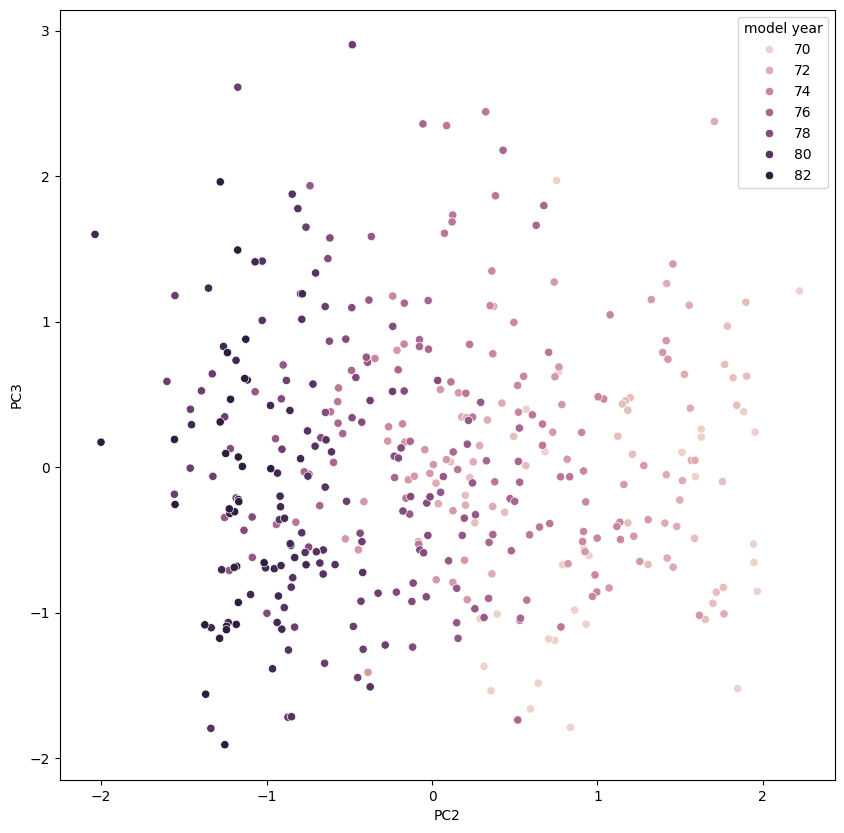

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=auto_pca1[1], y=auto_pca1[2], data = auto, hue = 'model year')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

In [80]:
from sklearn.metrics import silhouette_score

GMM = GaussianMixture(n_components = 6).fit(auto_pca)
labels = GMM.predict(auto_pca)
sc = silhouette_score(auto_pca, labels)



ValueError: Expected n_samples >= n_components but got n_components = 6, n_samples = 3

In [72]:
from sklearn.metrics import silhouette_score
sc = {}

for k in range (2,6):
    GMM = GaussianMixture(n_components = k).fit(auto_pca1)
    labels = GMM.predict(auto_pca1)
    sc[k] = silhouette_score(auto_pca, labels)

plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silheouette Score')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [3, 398]

## Observations
- It appears that our silheouette score decreases with more clusters so 2 cluster seems to be enough for the data

In [49]:
gmm = GaussianMixture(n_components=3)
gmm.fit(auto_scaled)

labels = pd.DataFrame(gmm.predict(auto_scaled))
labels.value_counts()
auto['gmm Labels'] = gmm.predict(auto_scaled)

plt.figure()
sns.scatterplot(data = auto, x = )

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,gmm Labels
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
